In [1]:
import pennylane as qml
import os



In [2]:
cd datasets/

/Users/mk/Desktop/project_course/datasets


In [3]:
codes = []
directory_path = './'
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    # Check if the current item is a file (and not a subdirectory)
    if os.path.isfile(file_path):
        try:
            # Open the file in read mode ('r')
            with open(file_path, 'r') as f:
                content = f.read()  # Read the entire content of the file
                codes.append(content)
                # You can perform further processing on 'content' here
        except Exception as e:
            print(f"Error opening or reading {filename}: {e}")


Error opening or reading circuit_images0.png: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte


In [4]:
cd ..

/Users/mk/Desktop/project_course


(<Figure size 16900x900 with 1 Axes>, <Axes: >)

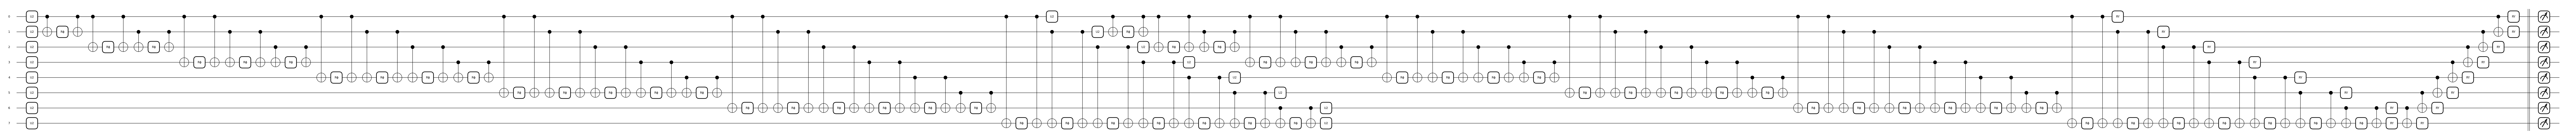

In [12]:
import matplotlib.pyplot as plt

def get_pennylane_gates(code):
    qasm_func = qml.from_qasm(
        code
    )
    with qml.tape.QuantumTape() as tape:
        qasm_func()
    return tape.operations, qasm_func


data = []
idx = 0
for code in codes:
    content_to_save, qnode = get_pennylane_gates(code)
    print(type(content_to_save))
    plt, axs =  qml.draw_mpl(qnode, decimals=15)()
    plt.savefig("circuit_images/" + str(idx) +".png")

    file_name = "circuit_ops/" + str(idx) + ".txt"

    try:
        with open(file_name, "w") as file_object:
            file_object.write(str(content_to_save))

    except IOError as e:
        print(f"Error writing to file: {e}")
    idx += 1


In [10]:
type(content_to_save[0])


pennylane.ops.qubit.parametric_ops_single_qubit.U2